## Insurance Claim Prediction

### Problem Statement

#### Task 1:-Create a predictive model which will help the insurance marketing team to know which customer will buy the product.

#### Task 2:-Suggestions to the Insurance market team to make  customers  buy the product.


### Notebook Content

    * About Missing Data
    
    * Drop Redundant Features & Replace Missing 
    
    * Data Preparation
    
    * Feature Selection (Random Forest Classifier)
    
    * Train A Model (Logistic Regression)
    
    * Predict & Output

### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")

### Read data

In [3]:
train = pd.read_csv("train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train.shape

(595212, 59)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [6]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# As -1 represents the null value here so replacing -1 with NaN
train_copied = train.copy()

train_copied.replace(-1, np.nan, inplace=True)

In [8]:
train_copied.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


ps_reg_03 - 107772, ps_car_03_cat - 411231, ps_car_05_cat - 266551, ps_car_07_cat - 11489, ps_car_14 - 42620 are the missing values.

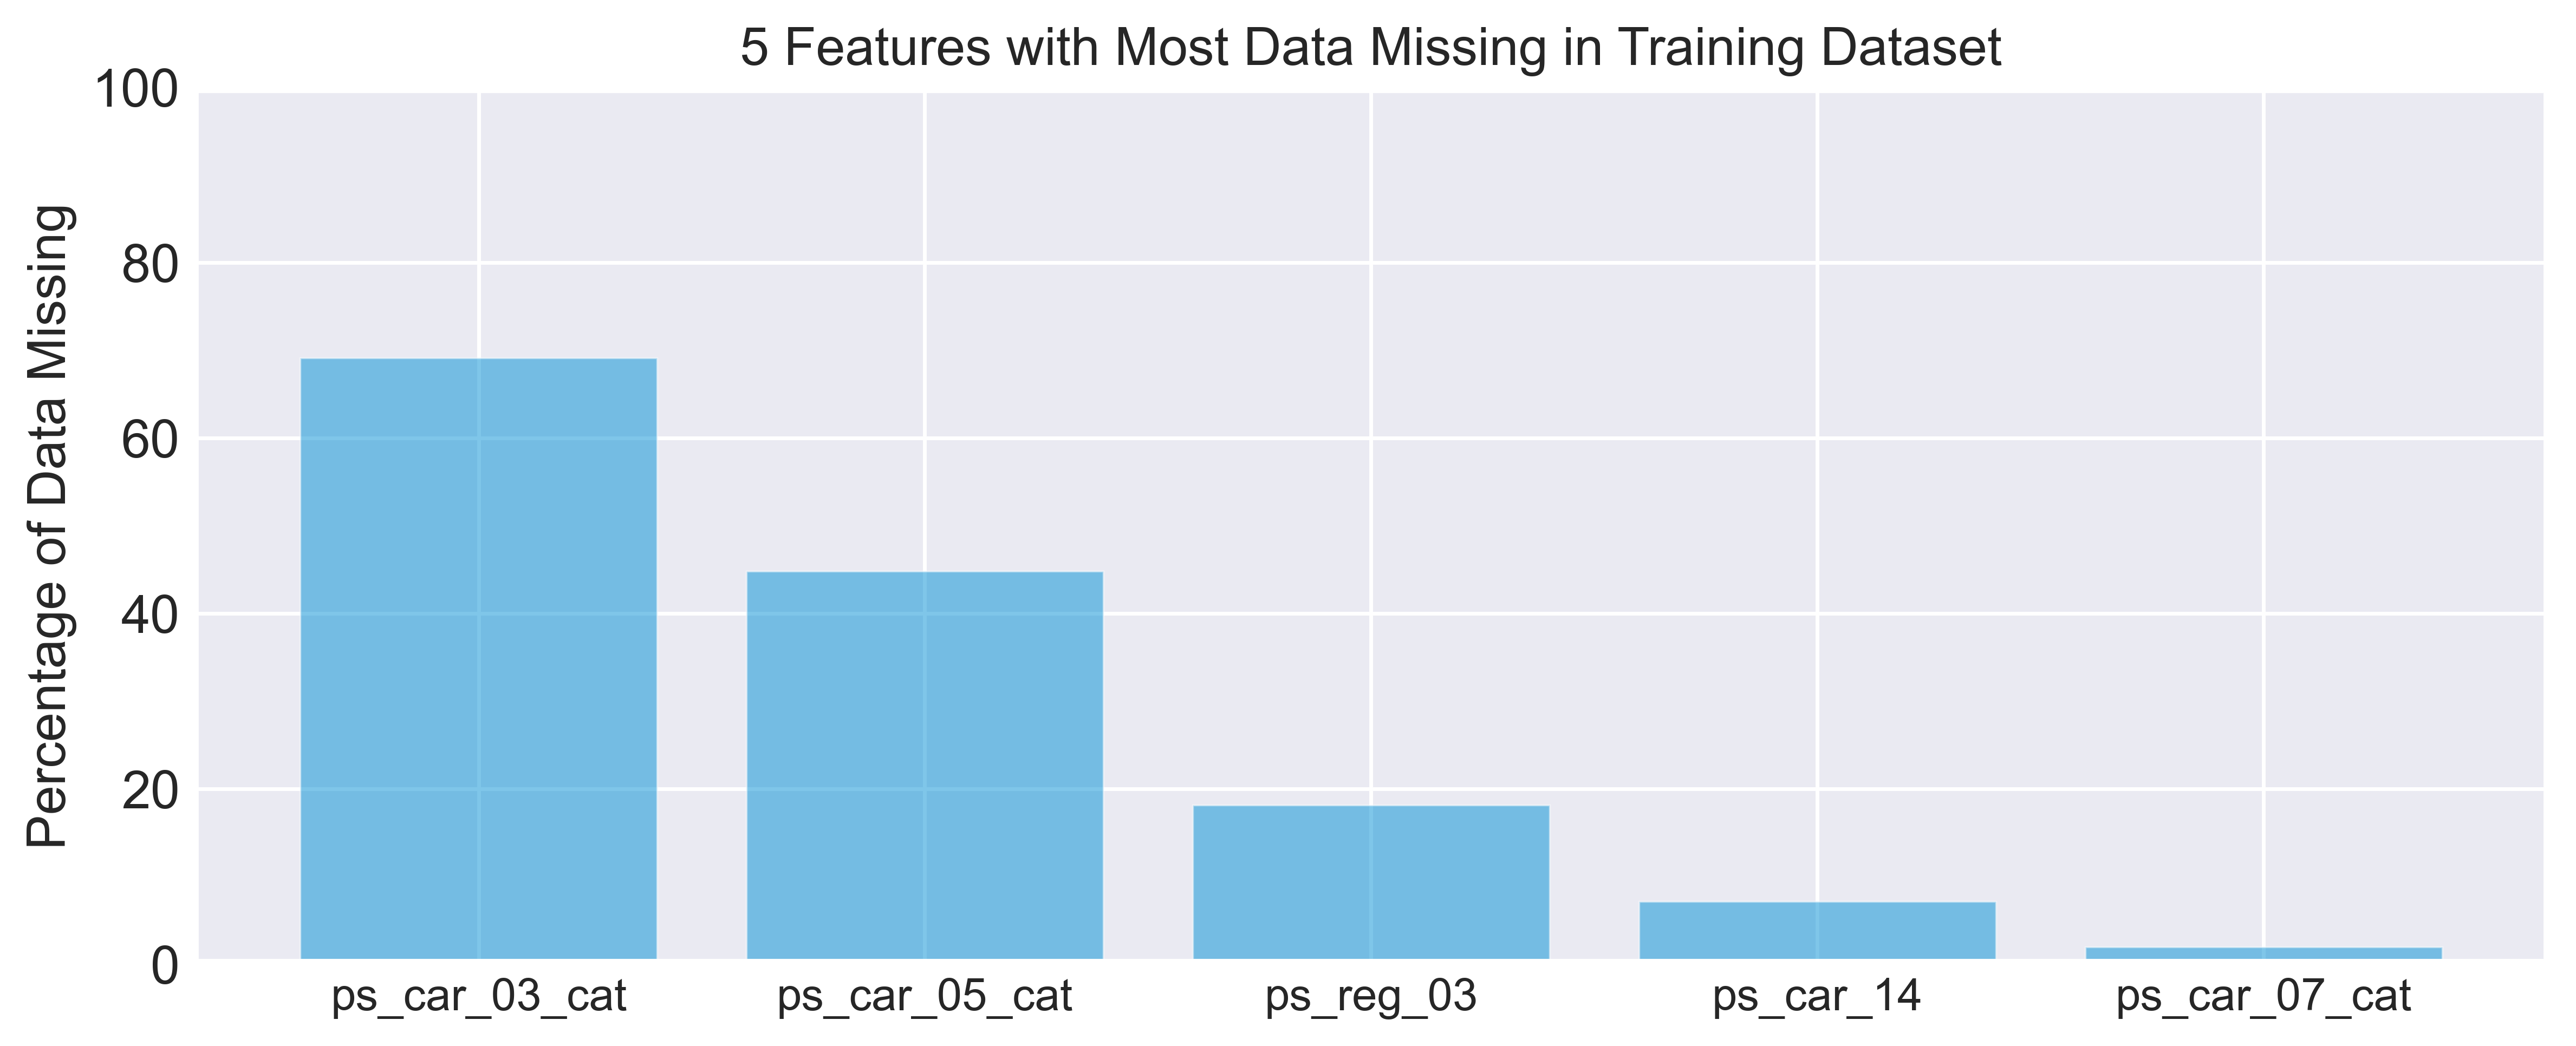

In [9]:
# Visualize the percentage of data missing
train_missingpercent = 100 * (train_copied.isnull().sum()/train_copied.isnull().count()).sort_values(ascending=False)

plt.figure(figsize = (10, 4), dpi = 500)
plt.bar(np.arange(5), train_missingpercent[:5], align='center', alpha=0.5)
plt.xticks(np.arange(5), train_missingpercent.index[:5], fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Data Missing', fontsize = 14)
plt.title('5 Features with Most Data Missing in Training Dataset', fontsize = 14) 
plt.savefig('five_features.jpg')
plt.show()

#### Drop Redundant Features & Replace Missing Data 

Features 'ps_car_03_cat' and 'ps_car_05_cat' have more than 40% data missing, drop them.

Analyze the correlations of all remaining features, drop redundant features

Replace missing data in remaining features

In [10]:
# drop features 'ps_car_03_cat' and 'ps_car_05_cat'
train = train_copied.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

In [11]:
train.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_04_cat          0
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0
ps_calc_03             0


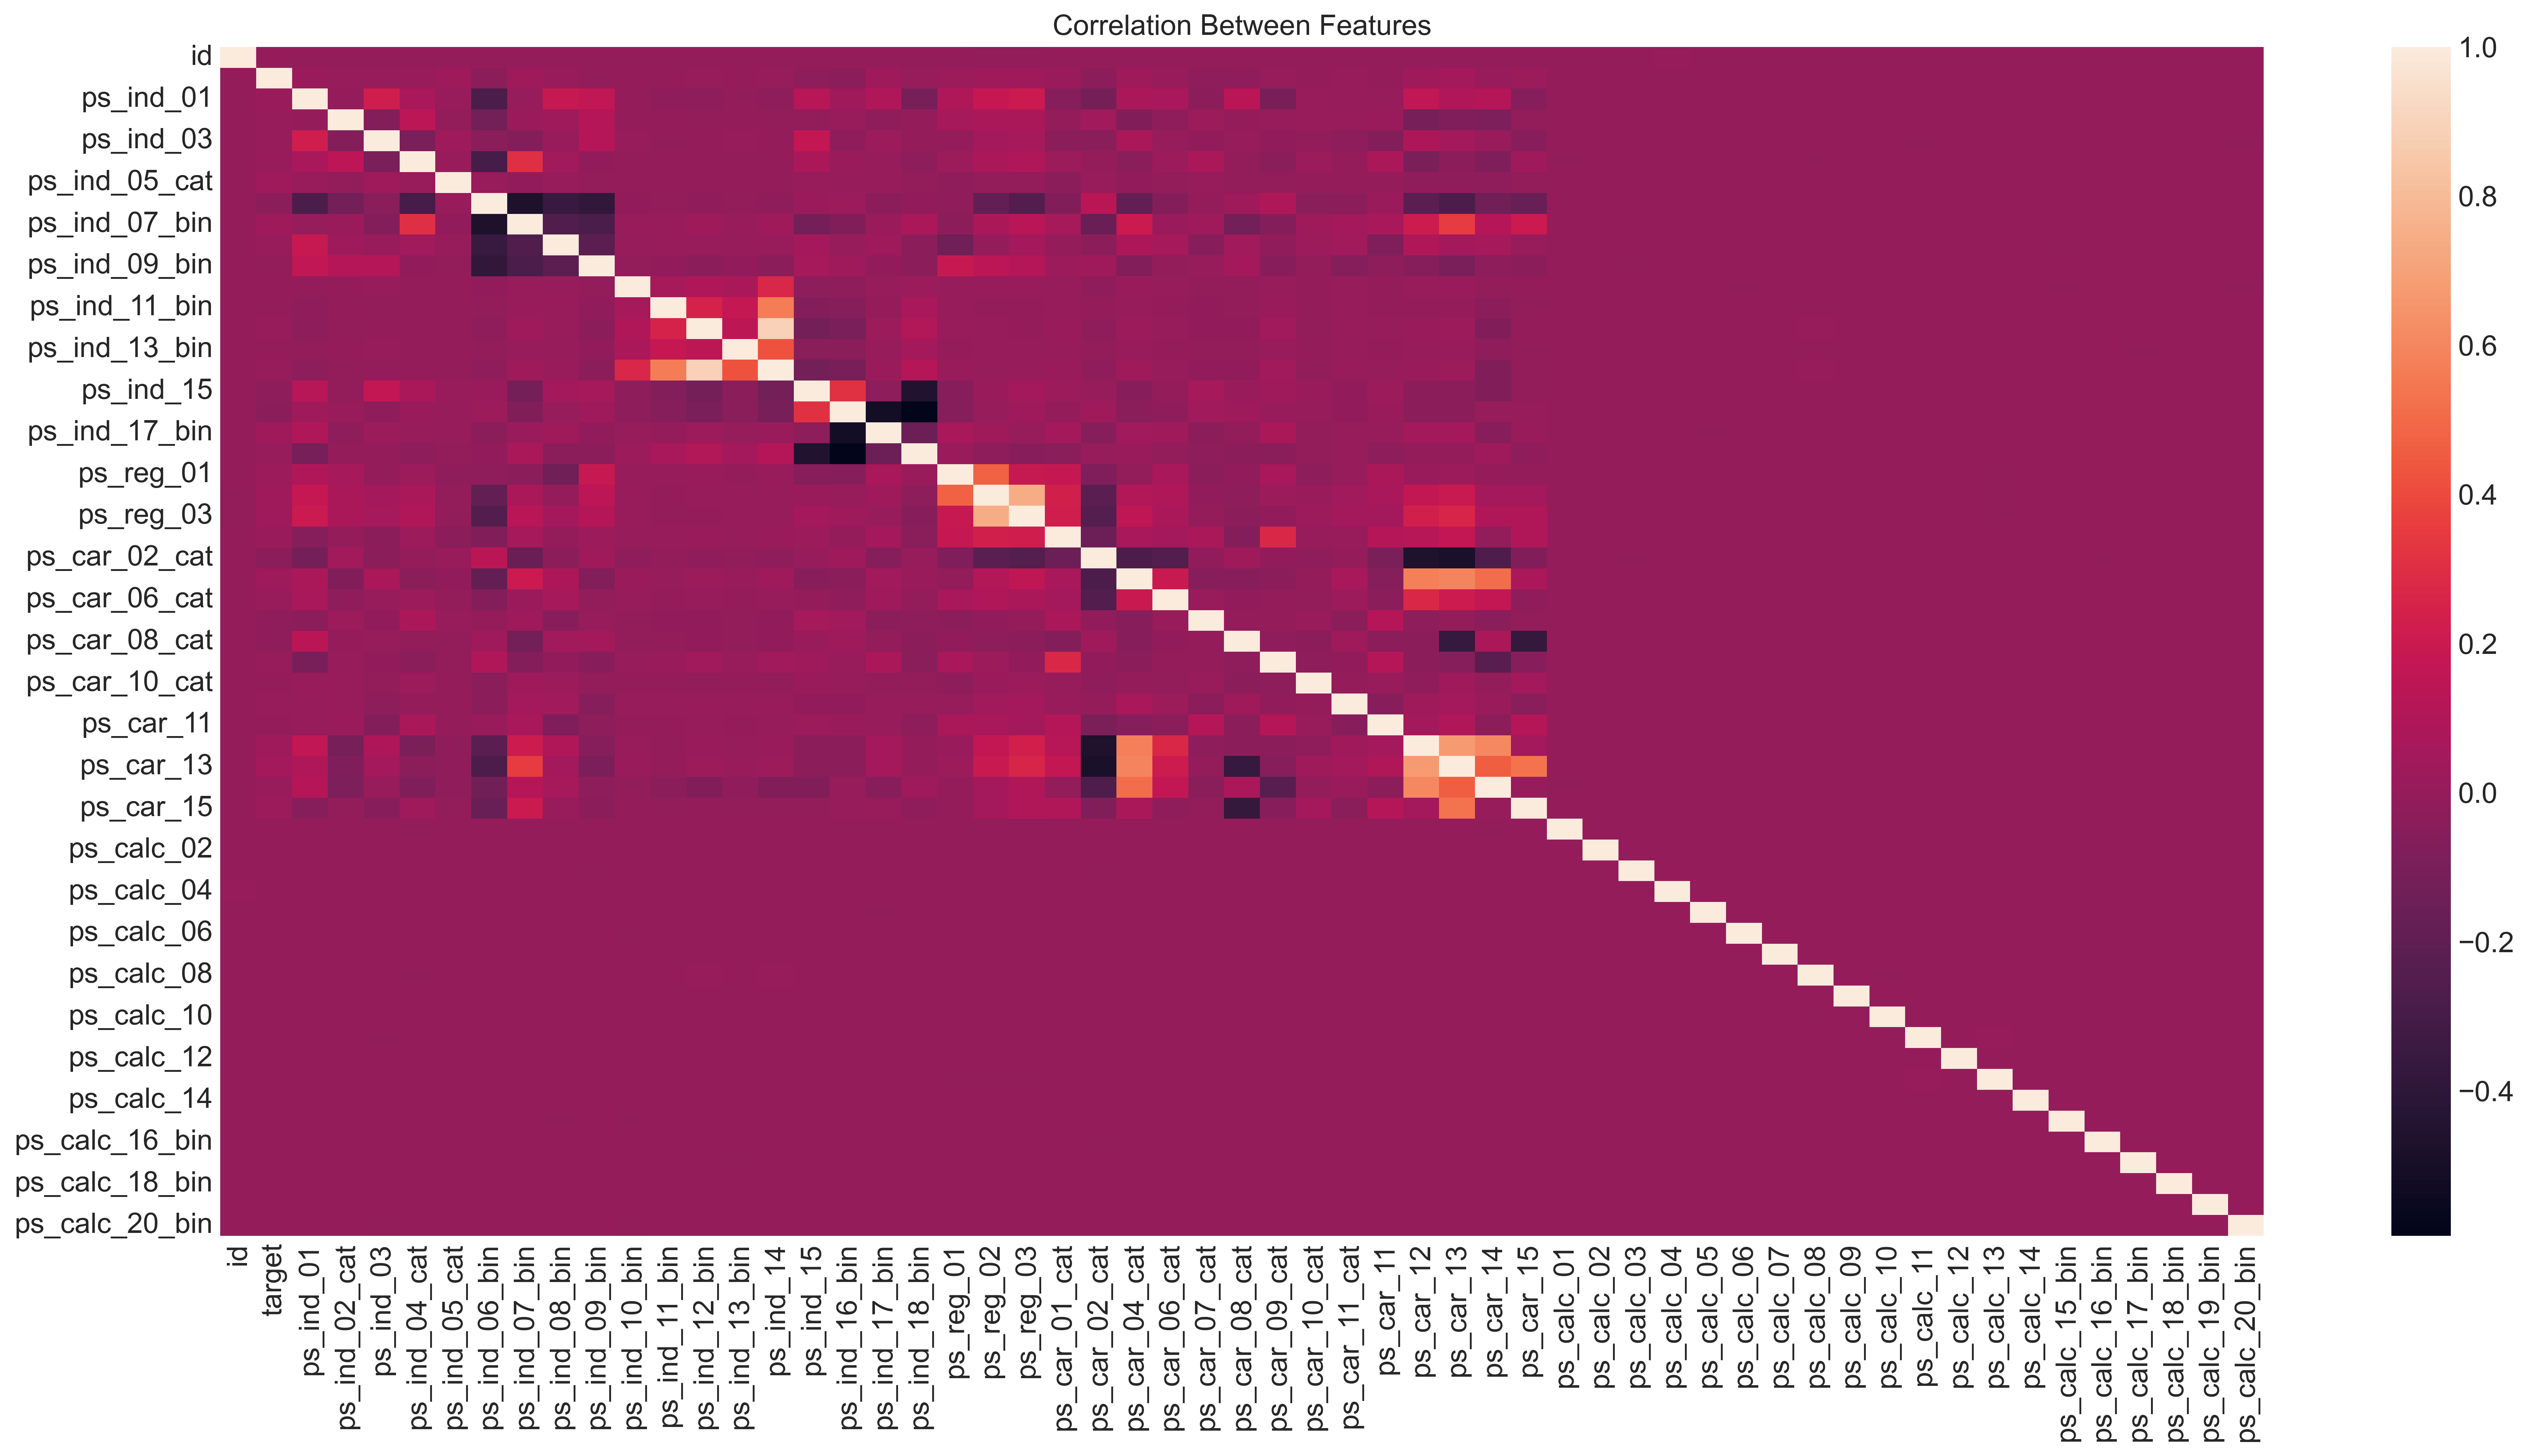

In [12]:
# visualize the correlation between remaining features
corr = train.corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.jpg')
plt.show()

Features with calc in their names show little correlation with any other features in the training dataset. For dimensionality reduction, we should drop these features also.

In [13]:
# drop features with '_calc_' in feature names
feature_calc = list(train.columns[train.columns.str.contains('_calc_')])
train = train.drop(feature_calc, axis = 1)

In [14]:
print(train.shape)

(595212, 37)


Now replace the missing data in the remaining features:

For binary features (bin) and categorical features (cat), replace missing data with the most frequest value of the feature
For other features (continuous or ordinal), replace missing data with mean value of the feature

In [15]:
# replace missing data in the remaining features
feature_bin = [f for f in train.columns if f.endswith('bin')] 
feature_cat = [f for f in train.columns if f.endswith('cat')] 
feature_els = [f for f in train.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['id', 'target'])]

for f in (feature_bin + feature_cat):
    train[f].fillna(value=train[f].mode()[0], inplace=True)
    
for f in feature_els:
    train[f].fillna(value=train[f].mean(), inplace=True)
    

Now let's look at these features' data distribution:

In [16]:
import warnings
warnings.simplefilter("ignore")

In [17]:
# Visualize binary features data and categorical features data (for styling, plot only features with 2 unique values)
plt.figure(figsize=(20, 20), dpi = 400)
count = 0

for f in (feature_bin + feature_cat):
    if  train[f].nunique() <= 2:
        ax = plt.subplot(4, 4, count+1)
        sns.countplot(train[f])
        plt.xlabel(f, fontsize = 14)
        plt.ylabel("Count", fontsize = 12)
        plt.ylim(0, 600000)
        count += 1
        
plt.savefig('distribution.jpg')
plt.show()

### Data Preparation

Before applying machine learning algorithms, I should conduct feature standardization (z-score normalization).

In [18]:
# standardization of non categorical features
feature_non_cat = [f for f in train.columns if (f.endswith('cat') != True) & (f not in ['id', 'target'])]
scaler = StandardScaler()

X_train = train.drop(['target', 'id'], axis=1)
y_train = train['target']

X_train.loc[:, feature_non_cat] = scaler.fit_transform(X_train[feature_non_cat])

Now I will covert categorical features to dummy variables (one-hot encoding). One thing to note is that feature 'ps_car_11_cat' has 104 unique values.

In [19]:
print(train['ps_car_11_cat'].unique())

[ 12  19  60 104  82  99  30  68  20  36 101 103  41  59  43  64  29  95
  24   5  28  87  66  10  26  54  32  38  83  89  49  93   1  22  85  78
  31  34   7   8   3  46  27  25  61  16  69  40  76  39  88  42  75  91
  23   2  71  90  80  44  92  72  96  86  62  33  67  73  77  18  21  74
  37  48  70  13  15 102  53  65 100  51  79  52  63  94   6  57  35  98
  56  97  55  84  50   4  58   9  17  11  45  14  81  47]


Because of the amount of categorical feature 'ps_car_11_cat' and other features have, the next step (coverting to dummy variables) will use about 2.2 GB memory and produce sparse matrix. Although executing the next cell is not very time-consuming, sometimes I run out of memory if I have many other applications running on my computer.

In [20]:
# covert categorical features to dummy variables
train_num = train.shape[0]

dataset = X_train
dataset = pd.get_dummies(columns=feature_cat, data=dataset)

X_train = dataset[:train_num]

print(X_train.shape)

(595212, 194)


In [21]:
# split training dataset to random training and testing dataset for validation later
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size = 0.7)

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [23]:
# Creating object for Logistic Regression
log_reg = LogisticRegression()

# Fitting the model
log_reg_p = log_reg.fit(X_train,y_train)

# Making predictions
y_pred_logreg = log_reg_p.predict(X_test)

In [24]:
# Using function for evaluating the model output
from sklearn.metrics import classification_report

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_logreg))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_logreg))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_logreg))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172015
           1       0.00      0.00      0.00      6549

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

#### Accuracy Score ####
accuracy score :  0.9633240742814901

#### Confusion Matrix ####
[[172015      0]
 [  6549      0]]


#### SVC

In [ ]:
from sklearn import svm

# Creating object for SVM
clf = svm.SVC()

# Fitting the model
clf_p = clf.fit(X_train,y_train)

# Making predictions
y_pred_svc = clf_p.predict(X_test)

In [ ]:
# Using function for evaluating the model output
from sklearn.metrics import classification_report

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_svc))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_svc))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_svc))

#### XGBoost

In [25]:
from xgboost import XGBClassifier

# Creating object for xgboost
xg = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 50,
                        alpha = 10, n_estimators = 100)

# Fitting the model
xg_p = xg.fit(X_train,y_train)

# Making predictions
y_pred_xg = xg_p.predict(X_test)

In [26]:
# Using function for evaluating the model output
from sklearn.metrics import classification_report

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_xg))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_xg))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_xg))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172015
           1       0.00      0.00      0.00      6549

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

#### Accuracy Score ####
accuracy score :  0.9633240742814901

#### Confusion Matrix ####
[[172015      0]
 [  6549      0]]


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'learning_rate': np.logspace(-3, -1, 5), 
    'n_estimator': np.arange(150, 1000, 100),
    'max_depth' : np.arange(1,15),
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'subsample': np.linspace(0.1, 1, 10)
}

xgb_final = XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(xgb_final, param_grid, n_iter= 25, cv=3, scoring="accuracy", verbose=2, n_jobs=-1, random_state=42)

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_

print("best parameters are: ", best_params_xgb)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Creating object for Adaboost
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Fitting the model
ada = adaBoost.fit(X_train,y_train)

# Making predictions
y_pred_ada = ada.predict(X_test)

In [ ]:
# Using function for evaluating the model output
from sklearn.metrics import classification_report

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_ada))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_ada))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_ada))

#### Hyperparameter tuning

In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error,r2_score


model=AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print('AdaBoostRegressor',model.score(X_train,y_train)*100)
print('AdaBoostRegressor',model.score(X_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

In [ ]:
#List Hyperparameters that we want to tune.
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Convert to dictionary
pre_gs_inst = RandomizedSearchCV(estimator=model,param_distributions = param_dist,cv=3,n_iter = 10,n_jobs=-1)

#Fit the model
pre_gs_inst.fit(X_train, y_train)

In [ ]:
#Print The value of best Hyperparameters
pre_gs_inst.best_params_

In [ ]:
pre_gs_inst.best_score_

#### MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size

#### MLP model

MLP classifier is neural network model and to choose the right no. of layers and size there is some of methods help us to choose the correct number :

The no. of hidden neurons should be between the size of the input layer and the size of the output layer.

The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

The no. of hidden neurons should be less than twice the size of the input layer.

In [28]:
from sklearn.neural_network import MLPClassifier

# Creating object for MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.0001,solver='adam', verbose=1,  
                    random_state=23, tol=0.000000001, activation='relu')

# Fitting the model
mlp_p = mlp.fit(X_train,y_train)

# Making predictions
y_pred_mlp = mlp_p.predict(X_test)

Iteration 1, loss = 0.15549930
Iteration 2, loss = 0.15276472
Iteration 3, loss = 0.15207712
Iteration 4, loss = 0.15151529
Iteration 5, loss = 0.15085066
Iteration 6, loss = 0.15017280
Iteration 7, loss = 0.14931379
Iteration 8, loss = 0.14842066
Iteration 9, loss = 0.14747361
Iteration 10, loss = 0.14627584
Iteration 11, loss = 0.14527922
Iteration 12, loss = 0.14406371
Iteration 13, loss = 0.14287148
Iteration 14, loss = 0.14158807
Iteration 15, loss = 0.14020657
Iteration 16, loss = 0.13893134
Iteration 17, loss = 0.13767002
Iteration 18, loss = 0.13642924
Iteration 19, loss = 0.13500756
Iteration 20, loss = 0.13386642
Iteration 21, loss = 0.13261229
Iteration 22, loss = 0.13148163
Iteration 23, loss = 0.13044054
Iteration 24, loss = 0.12937757
Iteration 25, loss = 0.12845073
Iteration 26, loss = 0.12756790
Iteration 27, loss = 0.12664582
Iteration 28, loss = 0.12600010
Iteration 29, loss = 0.12497570
Iteration 30, loss = 0.12426970
Iteration 31, loss = 0.12328857
Iteration 32, los

In [29]:
# Using function for evaluating the model output
from sklearn.metrics import classification_report

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_mlp))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_mlp))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_mlp ))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    172029
           1       0.07      0.03      0.04      6535

    accuracy                           0.95    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.95      0.94    178564

#### Accuracy Score ####
accuracy score :  0.949435496516655

#### Confusion Matrix ####
[[169347   2682]
 [  6347    188]]


#### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

# Creating object for Decession Tree
ds = DecisionTreeRegressor()

# Fitting the model
ds_p = ds.fit(X_train,y_train)

# Making predictions
y_pred_ds = ds_p.predict(X_test)

In [ ]:
# Using function for evaluating the model output
from sklearn.metrics import classification_report

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_ds))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_ds))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_ds))

### Hyper parameter 

In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print('DECISIONTREE REGRESSOR',model.score(X_train,y_train)*100)
print('DECISIONTREE REGRESSOR',model.score(X_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

In [ ]:
from sklearn.metrics import precision_recall_curve,r2_score,confusion_matrix,classification_report
print(r2_score(y_test,y_predict))

In [ ]:
from scipy.stats import randint

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,4,5,6], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9)} 

In [ ]:
# Instantiate a Decision Tree regressor: tree
tree = DecisionTreeRegressor()
  
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 

# Fit it to the data
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

### Conclusion

By removing the null values, adding the missing values, and determining the correlation between the datasets, the insurance claim prediction model is built. The information is then separated into feature and target data.
These are the techniques we have employed.

MLP classifier is a neural network model that is deployed. these are the technique we used Between the size of the input layer and the size of the output layer, there should be an appropriate number of hidden neurons. Input plus output layer sizes should be added together to get the number of hidden neurons. Instead of more than double the size of the input layer, the number of buried neurons should be fewer than For this model,

several sorts of algorithms are employed in this project but

logistic regression has given the best accuracy for our model and its 96%

and other algoritham like XGBoost also has given nice accuracy and its also 96%

Mlp classifier has given 95%

and Decision tree has given 92% for this model